In [ ]:
from matplotlib.patches import Circle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Reshape, Dropout
from tensorflow.keras.applications import ResNet152V2

In [ ]:
import os
import cv2
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

!pip install -q -U opencv-python


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


####Utils

In [ ]:
#show image and coords function
def show_img_and_eyes(img, coords=None):
    fig,ax = plt.subplots(1)
    ax.set_aspect('equal')



    ax.imshow(img)
    if(coords is not None):
      a=tuple(coords[:2])
      b=tuple(coords[2:])
      circ = Circle(a,6)
      circ2 = Circle(b,6)

      ax.add_patch(circ)
      ax.add_patch(circ2)

    return plt.show()

#DATA PROCESSING

####data get methods

In [ ]:
img_path ='/content/drive/MyDrive/Colab Notebooks/MY_OWN_CV_MODEL/new_dataset/augmented_data/agumented_images/'
l_path = '/content/drive/MyDrive/Colab Notebooks/MY_OWN_CV_MODEL/new_dataset/augmented_data/augmented_labels/'

In [ ]:
def get_dict_with_list(data):
  dict1 = { 
      'keypoints': {
          0: 1,
          1: 2,
          2: 3,
          3: 4,
      }
  }

  dict1['keypoints'][0] = int(data[0])
  dict1['keypoints'][1] = int(data[1])

  dict1['keypoints'][2] = int(data[2])
  dict1['keypoints'][3] = int(data[3])

  print(data[4])

  return dict1

In [ ]:
def get_labels(path='', min=0,max=31):

  points=[]
  for index in range (min,max): 
      filename=os.path.join(path, str(index)+'.json')  
      with open(filename, encoding='utf-8', mode='r') as f:
          label = json.load(f)
          one_label=[]
          one_label.append(label['keypoints']['0'])
          one_label.append(label['keypoints']['1'])
          one_label.append(label['keypoints']['2'])
          one_label.append(label['keypoints']['3'])
          #one_label.append(label['image'])

          points.append(one_label)


  return points

In [ ]:
def get_folder_images(path,resize,image_size=150, min=1 , max=31 ):

  images = []
  for index in range (min , max): 
      j=path+'/'+str(index)+'.jpg' 
      img = cv2.imread(os.path.join(j))
      print(j)
      if(resize):
        img = cv2.resize(img,(image_size, image_size))
      images.append(img)

  return images

##IMG

In [ ]:
all_images=get_folder_images(img_path, False ,min=1, max=180)

/content/drive/MyDrive/Colab Notebooks/MY_OWN_CV_MODEL/new_dataset/augmented_data/agumented_images//1.jpg
/content/drive/MyDrive/Colab Notebooks/MY_OWN_CV_MODEL/new_dataset/augmented_data/agumented_images//2.jpg
/content/drive/MyDrive/Colab Notebooks/MY_OWN_CV_MODEL/new_dataset/augmented_data/agumented_images//3.jpg
/content/drive/MyDrive/Colab Notebooks/MY_OWN_CV_MODEL/new_dataset/augmented_data/agumented_images//4.jpg
/content/drive/MyDrive/Colab Notebooks/MY_OWN_CV_MODEL/new_dataset/augmented_data/agumented_images//5.jpg
/content/drive/MyDrive/Colab Notebooks/MY_OWN_CV_MODEL/new_dataset/augmented_data/agumented_images//6.jpg
/content/drive/MyDrive/Colab Notebooks/MY_OWN_CV_MODEL/new_dataset/augmented_data/agumented_images//7.jpg
/content/drive/MyDrive/Colab Notebooks/MY_OWN_CV_MODEL/new_dataset/augmented_data/agumented_images//8.jpg
/content/drive/MyDrive/Colab Notebooks/MY_OWN_CV_MODEL/new_dataset/augmented_data/agumented_images//9.jpg
/content/drive/MyDrive/Colab Notebooks/MY_OWN_

In [ ]:
train_images = all_images[:120].copy()
test_images = all_images[120:140].copy()
val_images = all_images[140:len(all_images)].copy()

In [ ]:
print(len(train_images))
print(len(test_images))
print(len(val_images))

120
20
39


##LABEL

In [ ]:
all_labels=get_labels(l_path,1,179)

In [ ]:
train_labels = all_labels[:120].copy()
test_labels = all_labels[120:140].copy()
val_labels = all_labels[140:len(all_images)-1].copy()

In [ ]:
print(len(train_labels))
print(len(test_labels))
print(len(val_labels))

120
20
38


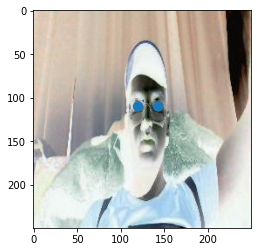

In [ ]:
img = test_images[4].copy()
lbl = test_labels[4].copy()

show_img_and_eyes(img,lbl)

#BUILD MODEL AND TRAIN

Build Model

In [ ]:
model = Sequential([
    Input(shape=(250,250,3)), 
    ResNet152V2(include_top=False, input_shape=(250,250,3)),
    Conv2D(512, 3, padding='same', activation='relu'),
    Conv2D(512, 3, padding='same', activation='relu'),
    Conv2D(256, 3, 2, padding='same', activation='relu'),
    Conv2D(256, 2, 2, activation='relu'),
    Dropout(0.05),
    Conv2D(4, 2, 2),
    Reshape((4,)),
])

model.summary()

Compile Model

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0007)
loss = tf.keras.losses.MeanSquaredError()

model.compile(optimizer, loss)

Train Model

In [ ]:
train_images = np.array(train_images) 
train_labels = np.array(train_labels) 
test_images = np.array(test_images)
test_labels = np.array(test_labels)


In [ ]:
hist = model.fit(train_images,train_labels ,epochs=3)

Epoch 1/3
4/4 [==============================] - 4s 869ms/step - loss: 0.0594
Epoch 2/3
4/4 [==============================] - 4s 872ms/step - loss: 0.0483
Epoch 3/3
4/4 [==============================] - 4s 873ms/step - loss: 0.0331


In [ ]:
hist.history


{'loss': [0.05943615734577179, 0.04827813431620598, 0.033146798610687256]}

In [ ]:
model.evaluate(test_images,test_labels,verbose=0)

2193965973504.0

In [ ]:
yhat = model.predict(test_images)


1/1 [==============================] - 0s 35ms/step


In [ ]:
yhat

array([[1120194.5 , 1098633.2 , 1201343.2 , 1057066.5 ],
       [1142195.6 , 1148139.6 , 1228877.1 , 1110297.9 ],
       [1147141.8 , 1136972.  , 1230101.  , 1081285.8 ],
       [1200375.4 , 1120945.1 , 1224295.1 , 1135276.2 ],
       [2322514.8 , 2381309.5 , 2568657.2 , 2208208.  ],
       [1848671.2 , 1773421.  , 1920429.  , 1750701.6 ],
       [ 942895.5 ,  985993.06, 1061447.4 ,  893527.4 ],
       [1030208.3 ,  970105.2 , 1052691.4 ,  991684.5 ],
       [1123242.1 , 1047659.44, 1155042.5 , 1042430.56],
       [1016098.2 ,  888808.3 ,  991689.44,  956136.56],
       [2331777.8 , 2398656.8 , 2596656.2 , 2206578.5 ],
       [1765597.4 , 1656492.8 , 1791519.8 , 1712535.2 ],
       [1188740.4 , 1194263.1 , 1305609.6 , 1112429.1 ],
       [1233881.2 , 1215140.1 , 1307799.  , 1203712.4 ],
       [1302279.8 , 1275591.  , 1385183.5 , 1220370.9 ],
       [1204696.5 , 1127721.9 , 1224339.1 , 1138157.4 ],
       [2204153.2 , 2276338.5 , 2454756.2 , 2101015.2 ],
       [1804610.1 , 1669164.2 ,

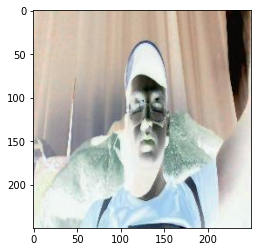

In [ ]:
x = np.ndarray.tolist(test_images[4].copy())
y = np.ndarray.tolist(yhat[4].copy())
show_img_and_eyes(x,y)

In [ ]:
fig, ax = plt.subplots(ncols=5, figsize=(40,40))
for idx in range(5): 
    sample_image = test_sample[0][idx]
    sample_coords = ghat[idx] 
    
    a=tuple(sample_coords[:2].astype(int))
    b=tuple(sample_coords[2:].astype(int))

    cv2.circle(sample_image, a , 2, (255,0,0), -1)
    cv2.circle(sample_image, b , 2, (0,255,0), -1)

    ax[idx].imshow(sample_image)
